In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
%matplotlib widget

In [2]:
WESAD_PATH = "."

In [3]:
subjects = [s for s in os.listdir(WESAD_PATH) if s.startswith("S")]
subjects.sort()
subjects

['S10.csv',
 'S11.csv',
 'S13.csv',
 'S14.csv',
 'S15.csv',
 'S16.csv',
 'S17.csv',
 'S2.csv',
 'S3.csv',
 'S4.csv',
 'S5.csv',
 'S6.csv',
 'S7.csv',
 'S8.csv',
 'S9.csv']

In [4]:
selected_subject = subjects[10]
data = pd.read_csv(f"{selected_subject}")
new_data = data[data["label"].isin((1,2,3,4))]
s = pd.Series([i+1 for i in range(len(new_data))])
new_data = new_data.set_index([s])


In [5]:
pca = PCA(n_components=3)

In [6]:
data_columns = [
    'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp',
    'chest_Resp', 'chest_ACC1', 'chest_ACC2', 'chest_ACC3', 'wrist_BVP',
    'wrist_EDA', 'wrist_TEMP', 'wrist_ACC1', 'wrist_ACC2', 'wrist_ACC3']
#data_1 = data.copy()
X = new_data[data_columns]
#X = np.array(X)

In [7]:
pca.fit(X)

PCA(n_components=3)

In [8]:
pca.explained_variance_ratio_

array([0.91940077, 0.04111421, 0.03029539])

In [9]:
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2','principal component 3']) 
principalDf.head()
finalDf=pd.concat([principalDf,new_data['label']],axis=1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,label
0,25.571737,-5.139493,-6.705470,NaN
1,25.571733,-5.139678,-6.705733,1.0
2,25.571734,-5.139239,-6.704668,1.0
3,25.571735,-5.139442,-6.705108,1.0
4,25.571734,-5.139677,-6.705589,1.0


In [13]:
finalDf[:1000]

,principal component 1,principal component 2,principal component 3,label
0,25.571737,-5.139493,-6.705470,NaN
1,25.571733,-5.139678,-6.705733,1.0
2,25.571734,-5.139239,-6.704668,1.0
3,25.571735,-5.139442,-6.705108,1.0
4,25.571734,-5.139677,-6.705589,1.0
...,...,...,...,...
995,74.781756,-4.890494,-5.750192,1.0
996,74.781755,-4.889783,-5.748395,1.0
997,74.781757,-4.890080,-5.749419,1.0
998,74.781760,-4.890037,-5.749249,1.0


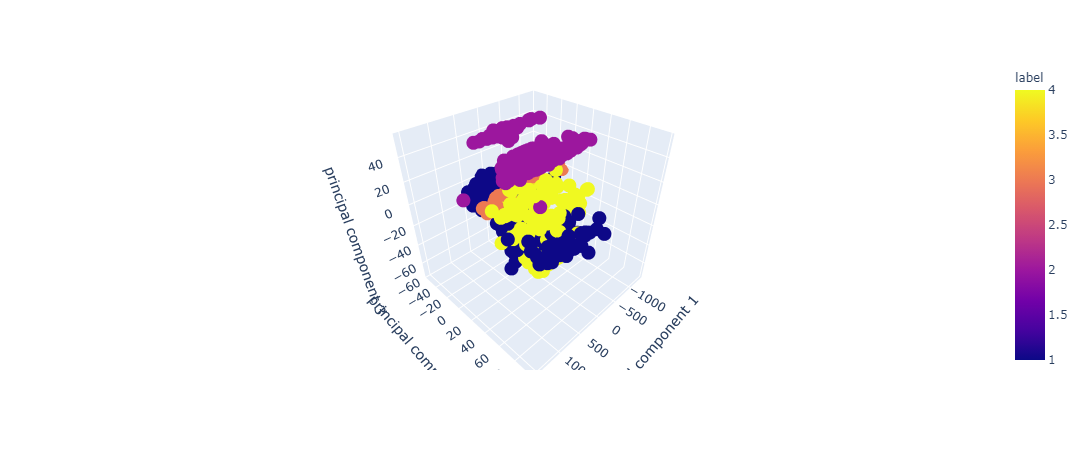

In [17]:
fig = px.scatter_3d(finalDf.sample(10000), x='principal component 1', y='principal component 2', z='principal component 3',
                    color='label')
fig.show()